<a href="https://colab.research.google.com/github/lourencocavalcante/my-studies/blob/main/Sistema_de_Controle_Fuzzy_Gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skfuzzy import control as ctrl
import matplotlib as plt
import skfuzzy as fuzz
import pandas as pd
import numpy as np

## Sistema de Controle Fuzzy

Vamos criar um sistema de controle fuzzy que modela como você pode escolher dar gorjeta em um restaurante. Ao dar gorjeta, você considera o serviço e a qualidade da comida, classificados entre 0 e 10. Você usa isso para deixar uma gorjeta entre 0 e 25%.

#### Nós formularíamos este problema como:
Antecedentes (Entradas)
   ##### serviço
    Universo (ou seja, faixa de valores nítidos): Como foi bom o serviço da equipe de garçons, em uma escala de 0 a 10?
    Conjunto fuzzy (ou seja, intervalo de valores difusos): fraco, aceitável, incrível

   ##### qualidade dos alimentos
    Universo: Quão saborosa era a comida, numa escala de 0 a 10?
    Conjunto fuzzy: ruim, decente, ótimo
    
Consequentes (Saídas)
   ##### gorjeta
    Universo: quanto devemos dar gorjeta, numa escala de 0% a 25%
    Conjunto fuzzy: baixo, médio, alto
    
Regras
    Se o serviço foi bom ou a qualidade da comida era boa, então a gorjeta será alta.
    Se o serviço foi médio, então a gorjeta será médio.
    Se o serviço foi ruim ea qualidade dos alimentos foi ruim, então a gorjeta será baixa
    
Uso
    Se eu disser a este controlador que eu avaliei:
   ##### o serviço como 9.8
   ##### a qualidade como 6.5,
    recomendação de saída:
    uma gorjeta de 20,2%.

# Variáveis Linguisticas. Termos Linguisticos

In [ ]:
# Novos objetos Antecedent / Consequent possuem variáveis ​​de universo e número de associação
    
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Fuzificação

In [ ]:
# Funções automáticas de pertinência com .automf (3, 5, ou 7)
quality.automf(3)
service.automf(3)

# As funções de pertinência personalizadas podem ser construídas de forma interativa com uma  API Pythonic
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\CONDA\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


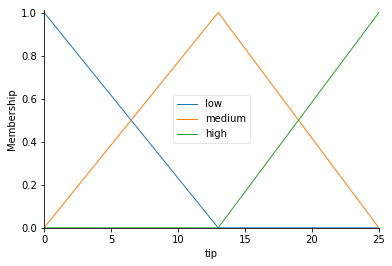

In [ ]:
# Você pode ver como elas se parecem com .view () 
tip.view()

### Regras Fuzzy
Agora, para tornar esses triângulos úteis, definimos a relação fuzzy entre as variáveis ​​de entrada e saída. Para os propósitos do nosso exemplo, considere três regras simples:

######    Se a comida é ruim OU o serviço é ruim, então a gorjeta será baixa
######    Se o serviço for médio, então a gorjeta será média
######    Se a comida é boa OU o serviço é bom, então a gorjeta será alta.

A maioria das pessoas concordaria com essas regras, mas as regras são confusas. 
Mapear as regras imprecisas em uma gorjeta definida e acionável é um desafio. 

# Esse é o tipo de tarefa na qual a lógica fuzzy é excelente.


# Maquina de Inferência

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
# rule1.view()

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
# Passe entradas para o ControlSystem usando rótulos Antecedent com Pythonic API 
# Nota: se você gosta de passar muitas entradas de uma só vez, use .inputs (dict_of_data)

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8


# Defuzificação

In [ ]:
tipping.compute()

19.847607361963192


C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\CONDA\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


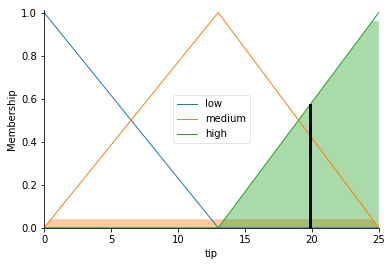

In [ ]:
print(tipping.output['tip'])
tip.view(sim=tipping)

# Variáveis Linguisticas. Termos Linguisticos

In [ ]:
# Gerar o universo das variáveis
# * Qualidade e serviço intervalos de  [0, 10]
# * Gorjeta tem um range de [0, 25] em unidades de pontos percentuais.
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

# Fuzificação

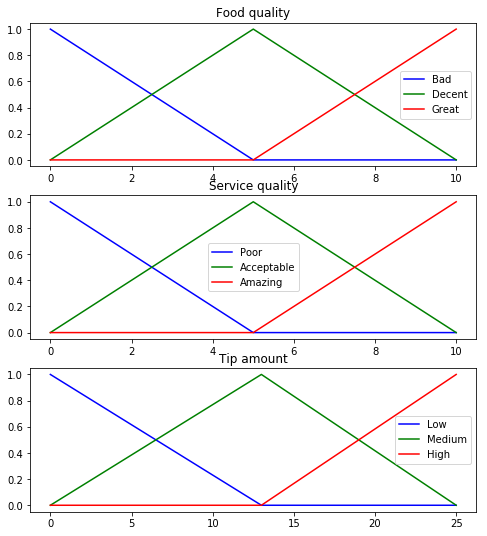

In [ ]:
# Gerando as funções de pertinências

qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualizando os universos e funções de pertinências
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()


# Máquina de Inferência 

Text(0.5,1,'Atividade de associação de saída')

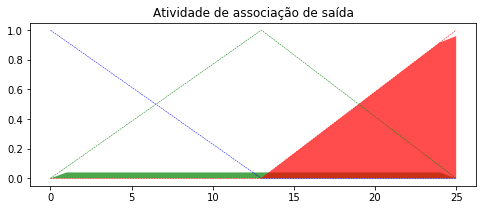

In [ ]:
# Precisamos da ativação de nossas funções de pertinências fuzzy nesses valores.
# Os valores exatos 6.5 e 9.8 não existem em nossos universos ...
# É para isso que o fuzz.interp_membership existe!

valueQua = 6.5
valueServ = 9.8

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, valueQua)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, valueQua)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, valueQua)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, valueServ)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, valueServ)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, valueServ)

# Agora tomamos nossas regras e as aplicamos. A regra 1 diz respeito a comida ruim OU serviço.
# O operador OR significa que tomamos o máximo desses dois.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
# Agora aplicamos isso cortando a parte superior da saída correspondente
# função de associação com `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo) # removido inteiramente para 0

# Para a regra 2, conectamos o serviço aceitável ao depósito médio
tip_activation_md = np.fmin(serv_level_md, tip_md)

# Para a regra 3, conectamos alta manutenção OU alta comida com alta gorjeta
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)


# Visualização
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Atividade de associação de saída')


# Defuzificação

Text(0.5,1,'Associação agregada e resultado (linha)')

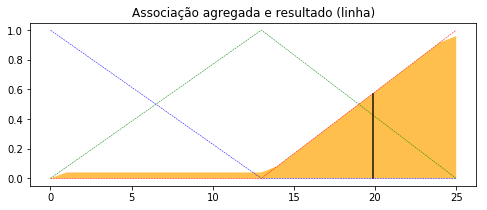

In [ ]:
# Agregue todas as três funções de associação de saída juntas
aggregated = np.fmax(tip_activation_lo,   np.fmax(tip_activation_md, tip_activation_hi))

# Calcular o resultado defuzzified
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip) # para o plot


# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Associação agregada e resultado (linha)')
